In [1]:
%matplotlib inline
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('../data/raw/arquivo_geral.csv', sep=';', parse_dates=['data'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295 entries, 0 to 2294
Data columns (total 7 columns):
regiao              2295 non-null object
estado              2295 non-null object
data                2295 non-null datetime64[ns]
casosNovos          2295 non-null int64
casosAcumulados     2295 non-null int64
obitosNovos         2295 non-null int64
obitosAcumulados    2295 non-null int64
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 125.6+ KB


In [4]:
new_cases = df.groupby(['data']).agg({
    'casosNovos': 'sum'
})

## Analise exploratória

Nessa seção vamos criar algumas visualizações da serie temporal e testar algumas transformações possiveis dos dados.

In [5]:
def plot_ts(series):    
    
    fig, ax = plt.subplots(3, 2, figsize=(15, 17));
    _df = pd.DataFrame(index=series.index)
    _df['casosNovos'] = series
    _df['x'] = series.index
    
    sns.lineplot(x='x', y='casosNovos', data=_df, ci=90, err_style='band', ax=ax[0, 0]);
    ax[0, 0].set_title('time series')
    
    plot_acf(series.dropna(), ax=ax[0, 1], lags=int(len(series)/2))
    ax[0, 1].set_title('acf')
    
    plot_pacf(series.dropna(), ax=ax[1, 1], lags=int(len(series)/2))
    ax[1, 1].set_title('pacf')
    
    series.plot.hist(bins=20, ax=ax[1, 0]);
    ax[1, 0].set_title('distribution')
    
    series.rolling('15D').std().plot(ax=ax[2, 0]);
    ax[2, 0].set_title('rolling std')
    
    series.rolling('15D').mean().plot(ax=ax[2, 1]);
    ax[2, 1].set_title('rolling mean');
    

In [6]:

def plot_decomposition(series):
    fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(17,8), sharex=True)
    res = seasonal_decompose(new_cases, model='aditive', freq=15)
    res.trend.plot(ax=ax1)
    res.resid.plot(ax=ax2)
    res.seasonal.plot(ax=ax3)

    ax1.set_title('Trend');
    ax2.set_title('Residual');
    ax3.set_title('Seasonality');
    return res

In [7]:
#raw
ts1 = new_cases.copy()

# primeira diferença
ts2 = new_cases.diff()

# ignorando os dados antes dos 100 primeiros casos
first_100 = np.where(ts1.cumsum() >= 100)[0][0]
ts3 = ts1[first_100:]

# primeira diferença da serie após os 100 primeiros casos
ts4 = ts3.diff()

### Serie temporal sem tratamento

/home/vittorfp/.local/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


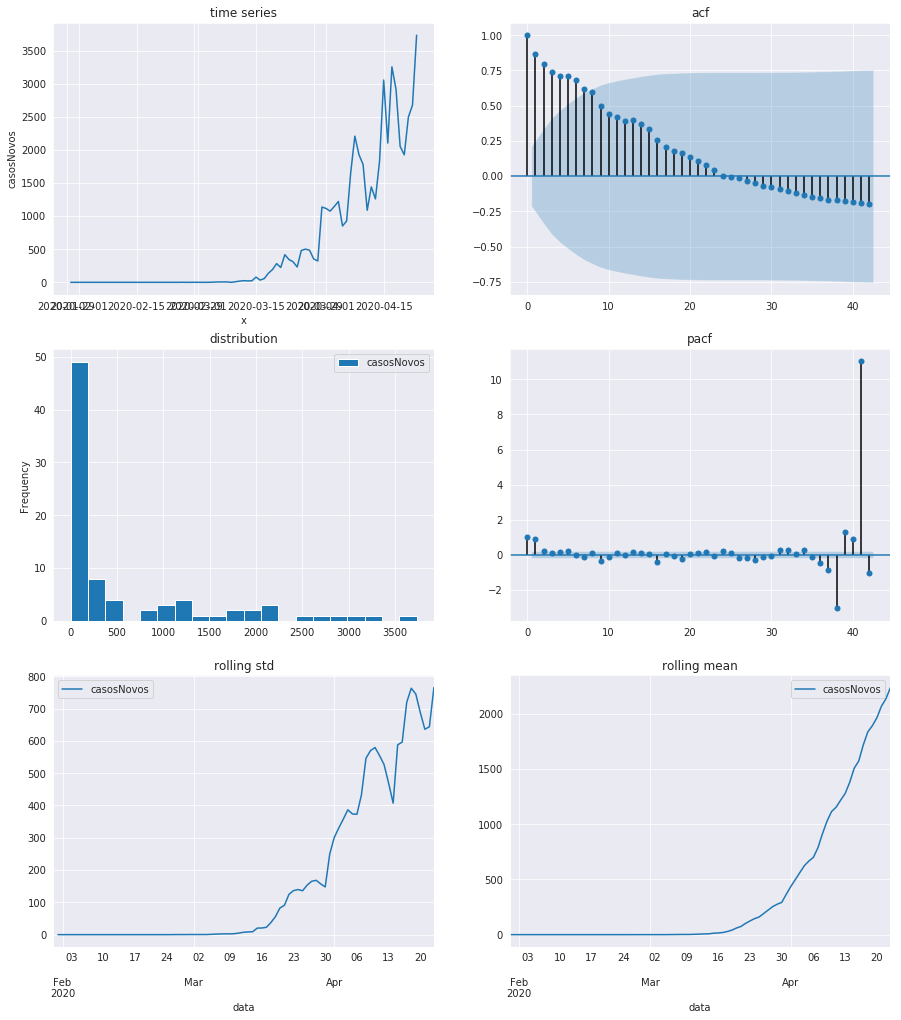

In [119]:
plot_ts(ts1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.


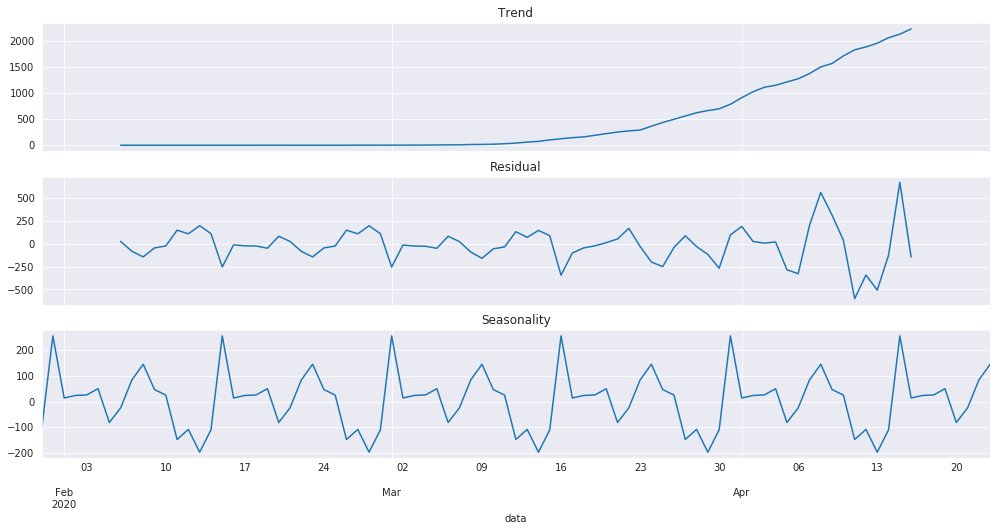

In [120]:
ts1_res = plot_decomposition(ts1);

## Primeira diferença da serie temporal

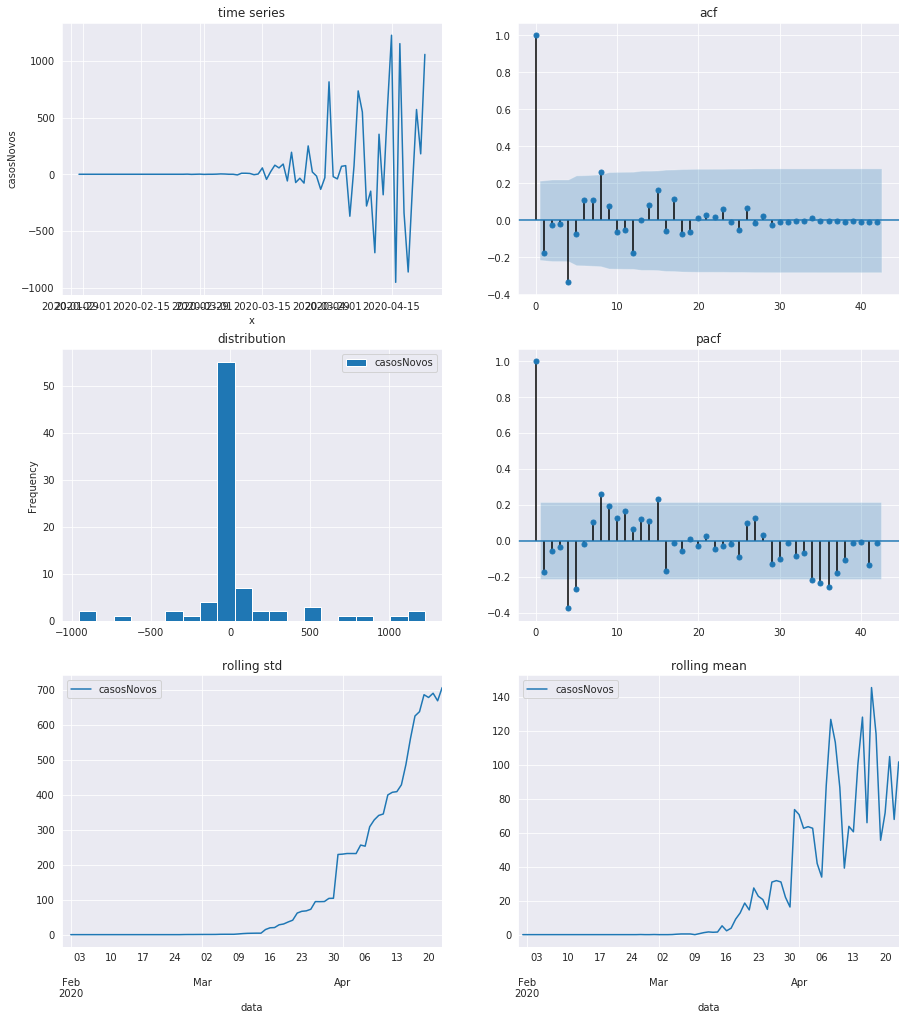

In [12]:
plot_ts(ts2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.


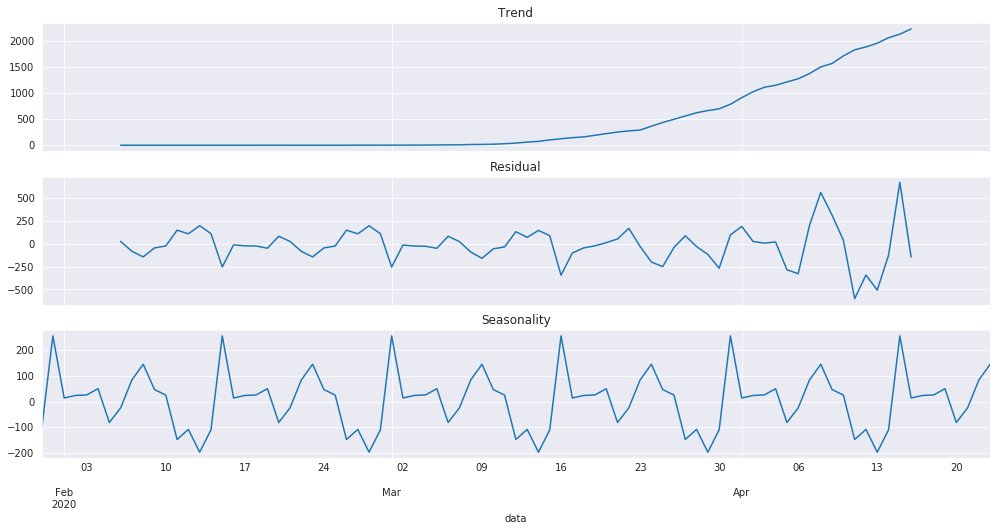

In [13]:
ts2_res = plot_decomposition(ts2);

## Retirando parte inicial da serie que não houveram casos
#### Após os 100 primeiros casos

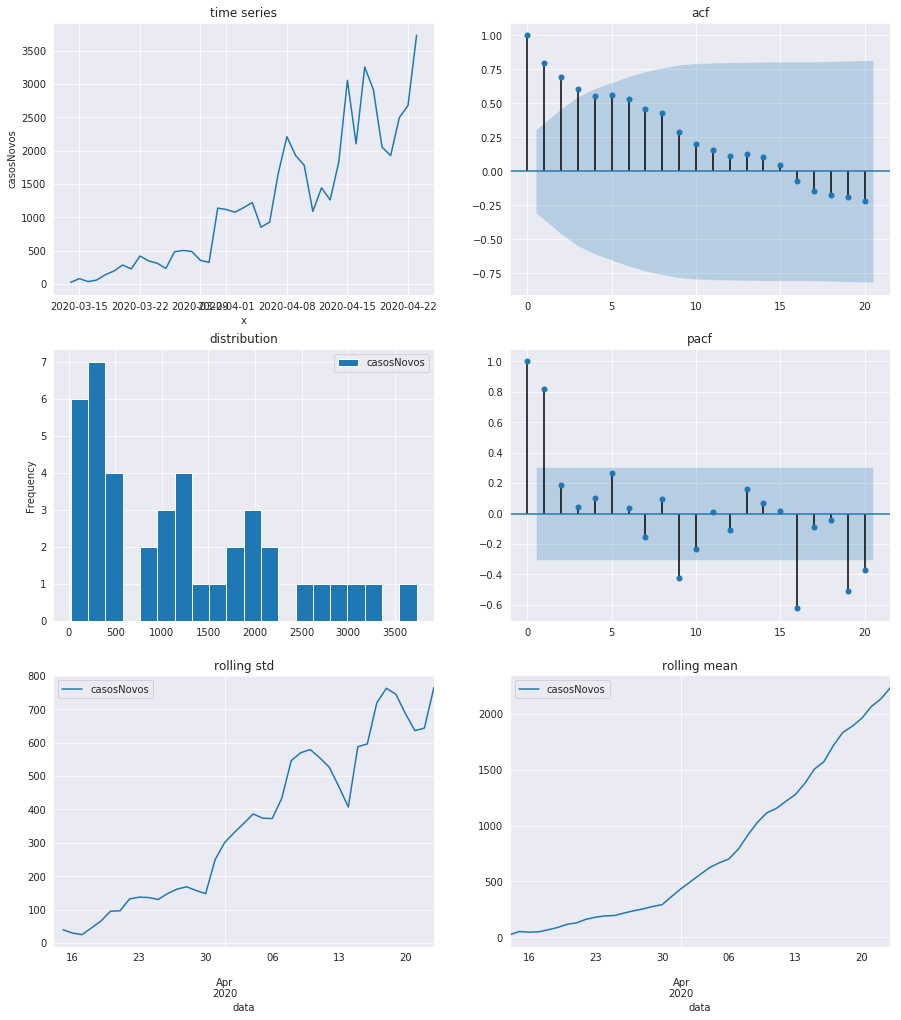

In [14]:
plot_ts(ts3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.


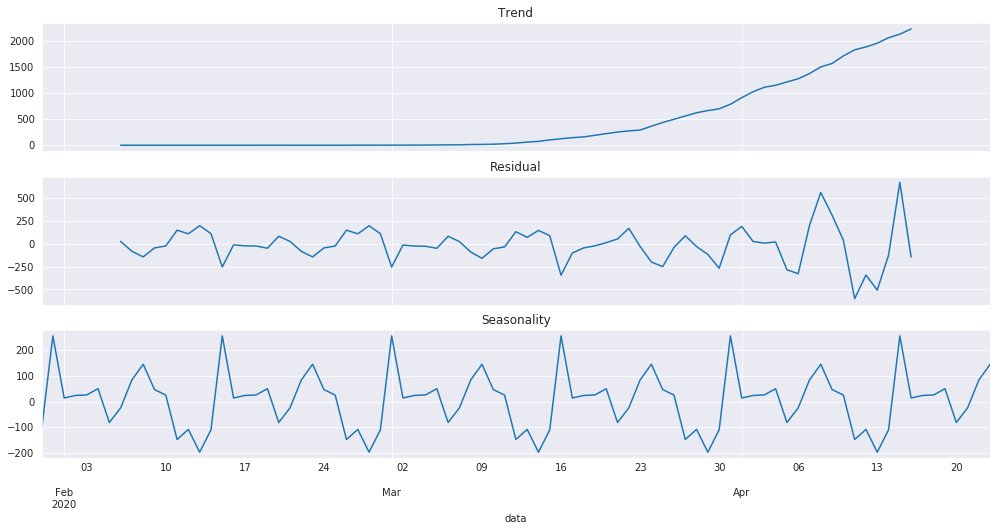

In [15]:
ts3_res = plot_decomposition(ts3);

## Primeira diferença da serie a partir do 100ø caso

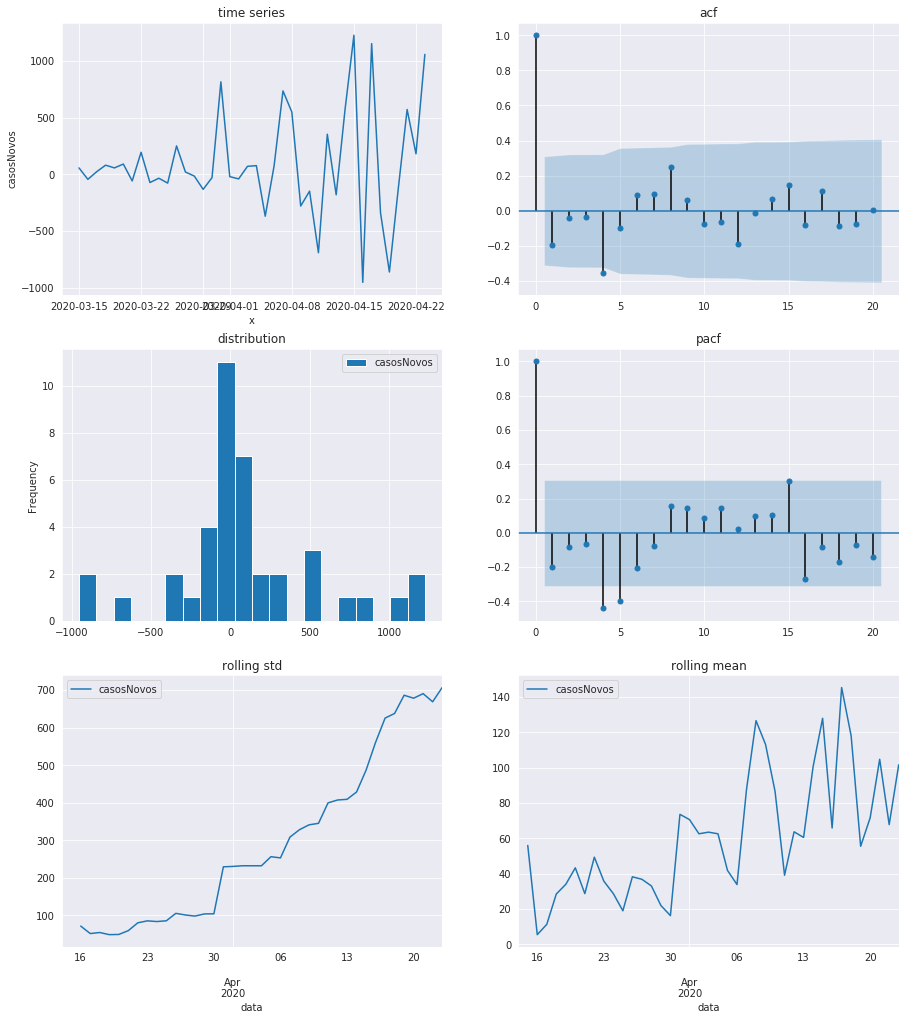

In [16]:
plot_ts(ts4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.


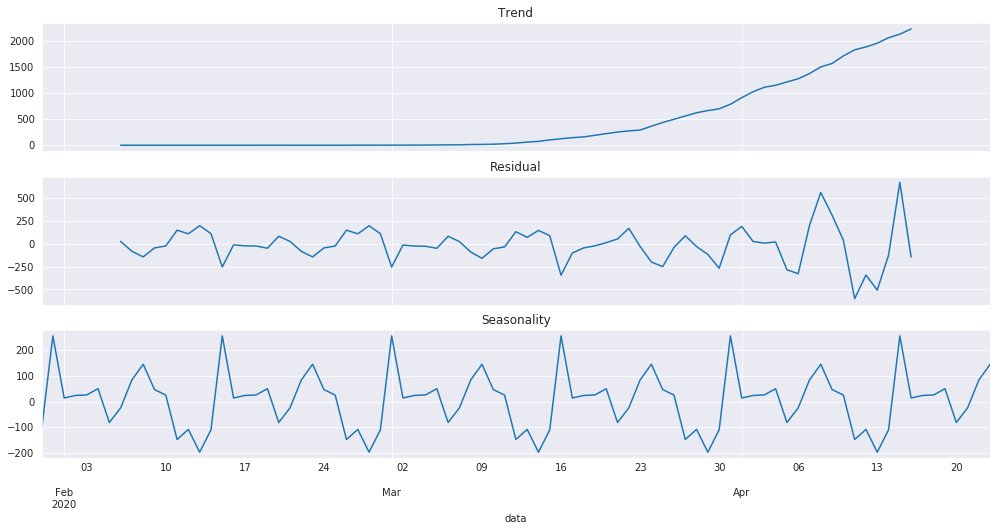

In [17]:
ts4_res = plot_decomposition(ts4);

## Modelagem

#### Verificação da estacionariedade

In [121]:
series = {
    'raw': ts1,
    'diff1': ts2,
    'after_100': ts3,
    'after_100_diff1': ts4
}

for name, s in series.items():
    res = sm.tsa.adfuller(s.dropna(), regression='ct')
    print('%22s | %s' % (name, 'non-stationary' if res[0] > res[4]['5%'] else 'stationary'))
    

                   raw | non-stationary
                 diff1 | stationary
             after_100 | stationary
       after_100_diff1 | stationary


In [30]:
ts = series['after_100'].dropna()
ts.index

DatetimeIndex(['2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
               '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
               '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
               '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
               '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
               '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06',
               '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10',
               '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14',
               '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18',
               '2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22',
               '2020-04-23'],
              dtype='datetime64[ns]', name='data', freq=None)

#### Divisão entre test e train

In [78]:
tr_start,tr_end = '2020-03-15', '2020-04-14'
te_start,te_end = '2020-04-13', '2020-04-20'
pred_end = '2020-04-27'
tra = ts[tr_start:tr_end].dropna()
tes = ts[te_start:te_end].dropna()

In [161]:
arima = sm.tsa.statespace.SARIMAX(tra,order=(0,1,2), freq='D', seasonal_order=(0,1,[],15), enforce_stationarity=False, enforce_invertibility=False,).fit() # Marco, rmse + aic
# arima = sm.tsa.statespace.SARIMAX(tra, order=(0,1,0), freq='D', seasonal_order=(0, 1,0, 17), enforce_stationarity=False, enforce_invertibility=False).fit() # vittor, rmse do teste
arima.summary()
#SARIMAX(0, 1, 0)x(0, 1, 0, 17) 

/home/vittorfp/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                           New cases   No. Observations:                   31
Model:             SARIMAX(0, 1, 2)x(0, 1, [], 15)   Log Likelihood                 -89.007
Date:                             Fri, 24 Apr 2020   AIC                            184.013
Time:                                     12:16:57   BIC                            185.468
Sample:                                 03-15-2020   HQIC                           183.475
                                      - 04-14-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2768      0.318     -0.872      0.383      -0.899       0.346
ma.L2         -0.4588      0.332     -1.382      0.167      -1.110       0.192
sigma2      1.596e+05   8.65e+04      1.846      0.065   -9899.457    3.29e+05
===================================================================================
Ljung-Box (Q):                       11.32   Jarque-Bera (JB):                 0.41
Prob(Q):                              0.42   Prob(JB):                         0.81
Heteroskedasticity (H):               8.57   Skew:                             0.04
Prob(H) (two-sided):                  0.06   Kurtosis:                         2.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [162]:
from sklearn.metrics import mean_squared_error
pred_train = arima.predict(tr_start,tr_end)[1:]
print('IN TRAIN: ARIMA model MSE:{}'.format(mean_squared_error(tra[1:], pred_train)))

IN TRAIN: ARIMA model MSE:95272.19269549593


In [163]:
pred_test = arima.predict(te_start,te_end)[1:]
print('IN TEST: ARIMA model MSE:{}'.format(mean_squared_error(tes[1:], pred_test)))

IN TEST: ARIMA model MSE:306353.2030664344


In [164]:
pred = arima.predict(te_start, pred_end)[1:]

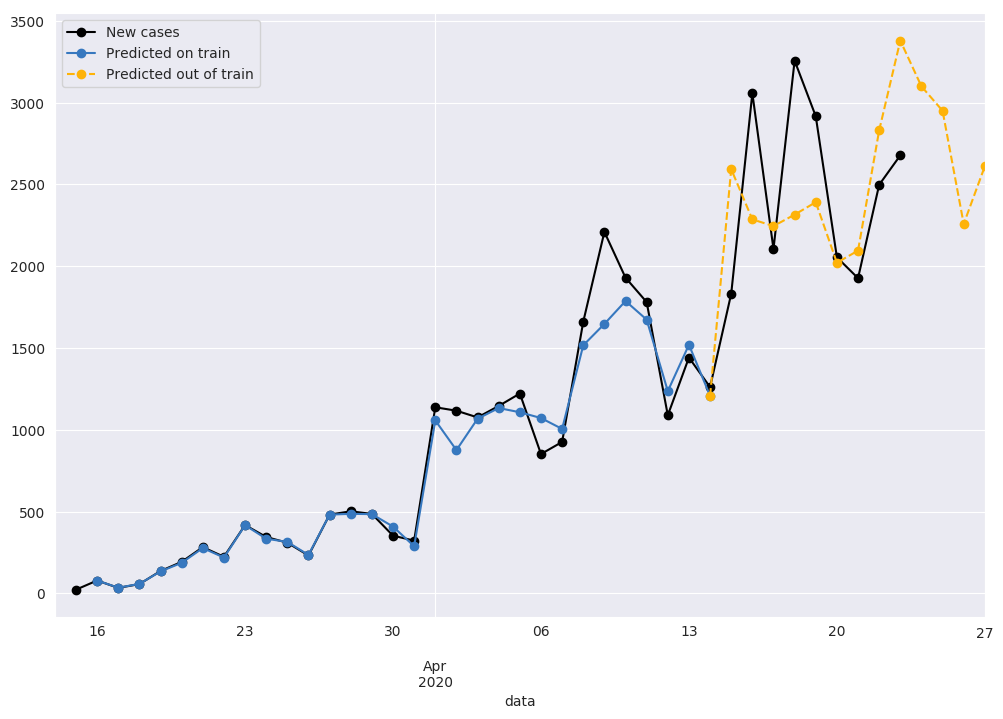

In [165]:
_, ax = plt.subplots(figsize=(12, 8), dpi=100)
pred_train.name = 'Predicted on train'
pred.name = 'Predicted out of train'
ts.columns = ['New cases']
ts.shift(1).plot(ax=ax, color='k', marker='o')
pred_train.plot(ax=ax, marker='o', color=sns.xkcd_rgb["windows blue"]);
pred.plot(ax=ax, ls='--', marker='o', color=sns.xkcd_rgb["amber"])
plt.legend();

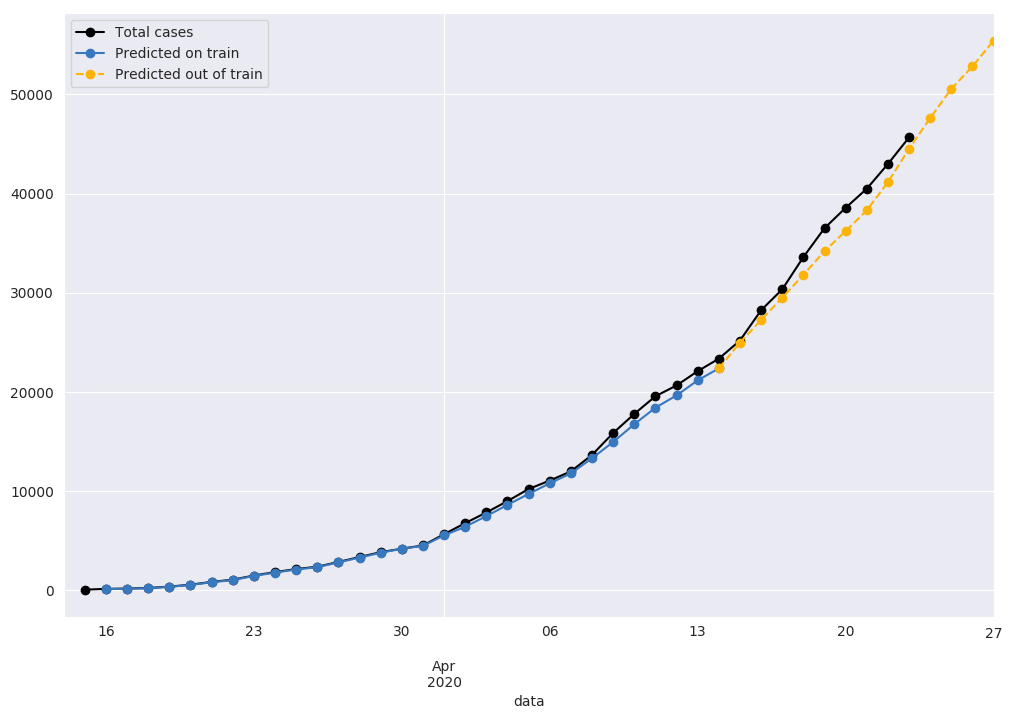

In [166]:
_, ax = plt.subplots(figsize=(12, 8), dpi=100)
pred_train.name = 'Predicted on train'
pred.name = 'Predicted out of train'

total_cases = ts.copy()
total_cases.columns = ['Total cases']
total_cases.shift(1).cumsum().plot(ax=ax, color='k', marker='o')

cum_test = pred.copy()
cum_test.loc[pd.Timestamp(tr_end)] = pred_train.cumsum().values[-1]
cum_test.sort_index(inplace=True)

ts.shift(1).cumsum().values[-1]
pred_train.cumsum().plot(ax=ax, marker='o', color=sns.xkcd_rgb["windows blue"]);
cum_test.cumsum().plot(ax=ax, ls='--', marker='o', color=sns.xkcd_rgb["amber"])
plt.legend();

In [167]:
pred

2020-04-14    1208.386571
2020-04-15    2593.489140
2020-04-16    2286.615414
2020-04-17    2245.615414
2020-04-18    2315.615414
2020-04-19    2391.615414
2020-04-20    2021.615414
2020-04-21    2095.615414
2020-04-22    2830.615414
2020-04-23    3379.615414
2020-04-24    3099.615414
2020-04-25    2950.615414
2020-04-26    2258.615414
2020-04-27    2611.615414
Freq: D, Name: Predicted out of train, dtype: float64

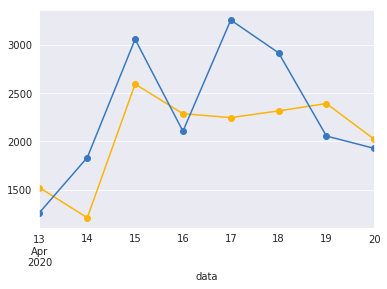

In [168]:
pred = arima.predict(te_start,te_end)
pred.plot( marker='o', color=sns.xkcd_rgb["amber"])
ts['New cases'].loc[pd.Timestamp(te_start): pd.Timestamp(te_end)].plot( marker='o', color=sns.xkcd_rgb["windows blue"]);

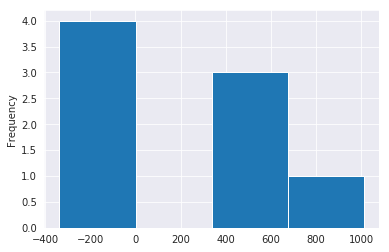

In [173]:
resid = (ts['New cases'].loc[pd.Timestamp(te_start): pd.Timestamp(te_end)] - pred)
resid.plot.hist(bins=4);

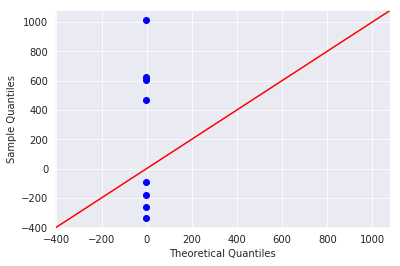

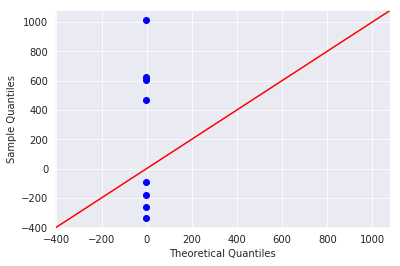

In [170]:
sm.qqplot(resid, line ='45')

## Obs.

Os residuos não estão com distribuição aproximando a normal, porem isso pode ser justificado pela baixo numero de amostras que temos fora do sample 